In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
puppy = imageio.imread('images\puppy.png')
gray_puppy = imageio.imread('images\gray_puppy.png')
coins = imageio.imread('images\coins.png')

In [6]:
puppy

Array([[[ 54,  65,  51],
        [ 54,  65,  51],
        [ 54,  65,  51],
        ...,
        [ 73,  74,  32],
        [ 75,  73,  32],
        [ 75,  73,  32]],

       [[ 54,  65,  51],
        [ 54,  65,  51],
        [ 54,  65,  49],
        ...,
        [ 73,  74,  32],
        [ 73,  74,  32],
        [ 75,  73,  32]],

       [[ 54,  65,  48],
        [ 54,  65,  48],
        [ 54,  65,  48],
        ...,
        [ 73,  74,  32],
        [ 72,  73,  31],
        [ 72,  73,  31]],

       ...,

       [[ 97,  73,  27],
        [176, 124,  77],
        [199, 159, 110],
        ...,
        [ 65,  89,  29],
        [ 62,  83,  27],
        [ 43,  32,   4]],

       [[153, 119,  73],
        [217, 159, 111],
        [152, 119,  66],
        ...,
        [ 77, 104,  35],
        [ 88, 111,  43],
        [ 85,  73,  33]],

       [[150, 124,  76],
        [197, 144,  94],
        [147, 115,  56],
        ...,
        [ 84, 110,  37],
        [ 89, 111,  36],
        [114, 101,  49]]

In [3]:
def invert_colors(image):
    result = np.zeros(image.shape, dtype=int)
    a = np.zeros(image.shape)+ 255
    result[:, :, 0] = a[:, :, 0]-image[:, :, 0]
    result[:, :, 1] = a[:, :, 1]-image[:, :, 1]
    result[:, :, 2] = a[:, :, 2]-image[:, :, 2]
    return result

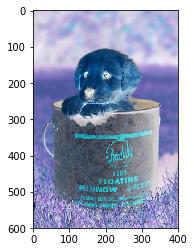

In [4]:
b= invert_colors(puppy)

plt.imshow(b)

In [28]:
def flip_horizontal (img):
    result = img.copy ()
    return result [::-1, :, :]

In [51]:
def convolution (img , kernel):
    height, width = img.shape
    print(kernel . shape [0])
    print(kernel . shape [1])
    k_width = kernel . shape [0]
    print(k_width)
    res = np. zeros (( height - k_width + 1, width - k_width + 1))
    for i in range(res. shape [0]) :
        for j in range(res. shape [1]) :
            curr = img [i:i+k_width , j:j+ k_width ]
            val = np.sum(curr * kernel )
            res[i, j] = val
    return res

In [60]:
def separate(img):
    height, width, depth, = img.shape
    res = np.zeros((height, width*3, depth), dtype=int)
    res[:,:width,0]=img[:,:,0]
    res[:,width:width*2,1]=img[:,:,1]
    res[:,width*2:width*3,2]=img[:,:,1]
    return res

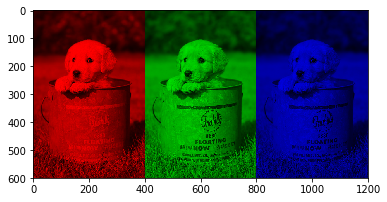

In [61]:
plt.imshow(separate(puppy))

3
3
3
3
3
3


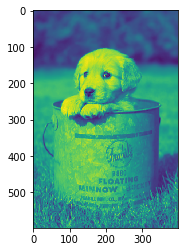

In [52]:
f = np.array([[0,0,1],[0,1,0],[0,1,1]])
convolution(gray_puppy, f)
plt.imshow(convolution(gray_puppy, f))

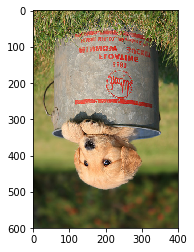

In [29]:
plt.imshow(flip_horizontal(puppy))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


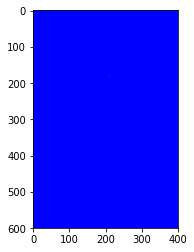

In [420]:
a = np.zeros(img.shape)+[0,0,225]
plt.imshow(a-img)

In [317]:
kernel = np.array([[1.0,1.0,1.0], [1.0,1.0,1.0], [1.0,1.0,1.0]])
kernel = kernel / np.sum(kernel)
arraylist = []
for y in range(3):
    temparray = np.copy(img)
    
    temparray = np.roll(temparray, y - 1, axis=0)
    
    for x in range(3):
        temparray_X = np.copy(temparray)
        temparray_X = np.roll(temparray_X, x - 1, axis=1)*kernel[y,x]
        arraylist.append(temparray_X)
arraylist = np.array(arraylist)
arraylist_sum = np.sum(arraylist, axis=0)


In [381]:
def blur(image, patch_size):
    size = patch_size
    x, y = image.shape
    xx, yy = x - size + 1, y - size + 1
    patch_means = np.zeros((xx, yy))
    for i in range(xx):
        for j in range(yy):
            patch_means[i, j] = image[i: i+size, j: j+size].mean()
    return patch_means.astype(np.uint8)
    
    #fig, ax = plt.subplots()
    #ax.imshow(patch_means)    

In [ ]:
def magnitude(img, size):
    h, w = img.shape
    res = np.zeros((h-size+1, w-size+1))
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
    #hh, ww = h-size+1, w-size+1
    #for i in range(hh):
        #for j in range(ww):
            curr = img[i:i+size, j:j+size]
            res[i, j]= np.sqrt(np.sum(curr**2))
    return res

[[ 43  43  42 ...  67  67  68]
 [ 43  42  42 ...  67  67  67]
 [ 42  42  41 ...  67  67  67]
 ...
 [112 112 112 ... 104 103 103]
 [113 112 113 ... 104 103 103]
 [113 113 113 ... 104 104 103]]


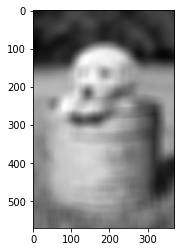

In [421]:
c = blur(gray_puppy, 30)
print(c)
plt.imshow(c, cmap='gray')

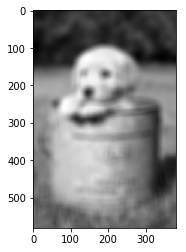

In [323]:
size = 20
m, n, l = img.shape
mm, nn = m - size + 1, n - size + 1

patch_means = np.empty((mm, nn))
for i in range(mm):
    for j in range(nn):
        patch_means[i, j] = img[i: i+size, j: j+size].mean()

fig, ax = plt.subplots()
ax.imshow(patch_means, cmap='gray')
ax.grid(False)

In [355]:
def find_xy(result):
    """
    Given the result of template_match, finds the position (x, y) with
    the highest similarity.
    """
    ij = np.unravel_index(np.argmax(result), result.shape)
    return ij[::-1]


def plot_result(image, template, result):
    """
    Given an image, a template, and the result of
    template_match(image, template), makes a plot showing the result
    of the match.
    """
    x, y = find_xy(result)

    plt.figure(figsize=(8, 3))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

    ax1.imshow(template, cmap=plt.cm.gray)
    ax1.set_axis_off()
    ax1.set_title('template')

    ax2.imshow(image, cmap=plt.cm.gray)
    ax2.set_axis_off()
    ax2.set_title('image')
    # highlight matched region
    template_height,  template_width = template.shape
    rect = plt.Rectangle((x, y), template_width, template_height,
                         edgecolor='r', facecolor='none')
    ax2.add_patch(rect)

    ax3.imshow(result)
    ax3.set_axis_off()
    ax3.set_title('`match_template`\nresult')
    # highlight matched region
    ax3.autoscale(False)
    ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none',
             markersize=10)
    plt.show()

In [435]:
def template_match(big_image, small_image):
    smallx, smally = small_image.shape
    bigx, bigy = big_image.shape
    xstop = bigx - smallx + 1
    ystop = bigy - smally + 1
    result = np.zeros((xstop, ystop), dtype='int')
    for x in range(xstop):
        for y in range(ystop):
            curr = big_image[x:x+smallx, y:y+smally]
            curr_mean = big_image[x:x+smallx, y:y+smally].mean()
            tem = small_image
            tem_mean = small_image.mean()
            
            result[x, y] = np.sum((curr-curr_mean)*(tem-tem_mean))
    return result

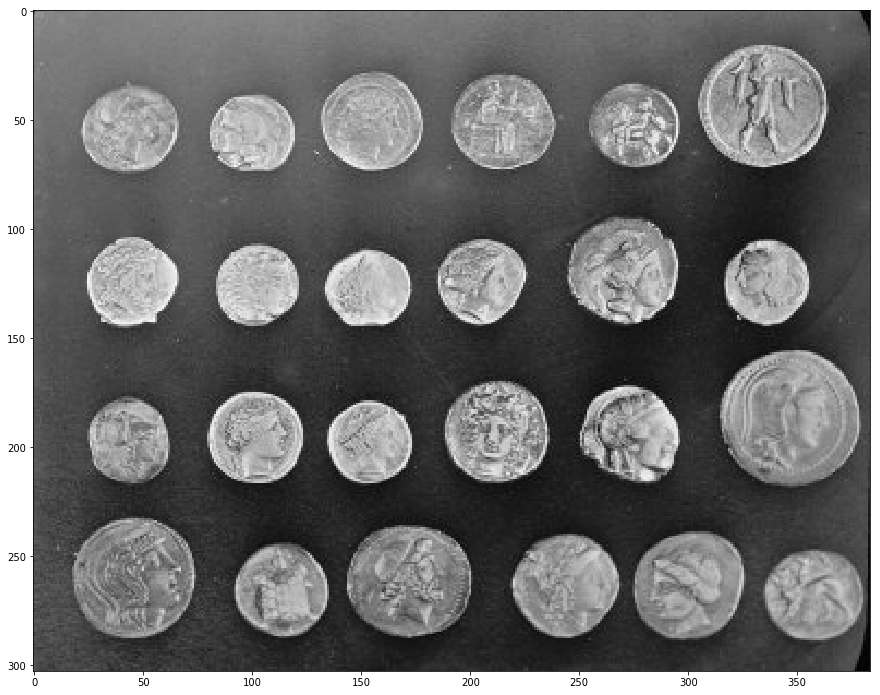

In [395]:
coins = imageio.imread('images\coins.png')
fig = plt.figure(figsize=(15, 15))
imgplot = plt.imshow(coins, cmap='gray')


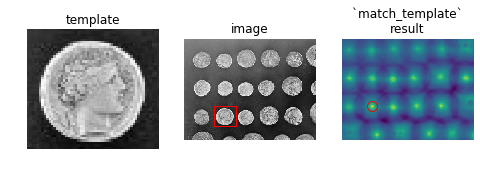

In [438]:
template_match(coins,coins[170:220, 75:130])
plot_result(coins, coins[170:220, 75:130], template_match(coins,coins[170:220, 75:130]))

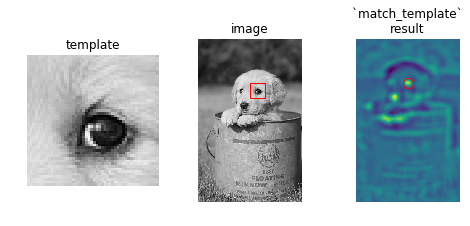

In [439]:
plot_result(gray_puppy, gray_puppy[150:200, 175:225], template_match(gray_puppy,gray_puppy[150:200, 175:225]))

In [440]:
template_match(coins,coins[170:220, 75:130])

array([[-798253, -776216, -758895, ...,  994029,  911504,  813142],
       [-766440, -744686, -734503, ..., 1090501,  970208,  851494],
       [-729806, -715649, -701622, ..., 1224299, 1082599,  919135],
       ...,
       [ 734562,  799350,  856622, ..., 3178308, 3447549, 3758404],
       [ 694281,  758850,  852579, ..., 2828108, 3088096, 3395901],
       [ 633562,  670492,  768755, ..., 2528597, 2774698, 3071083]])